In [10]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from utils.utils import transform_ghg_dataset
from ydata_synthetic.preprocessing.timeseries.utils import real_data_loading
from sklearn.preprocessing import MinMaxScaler
import numpy as np

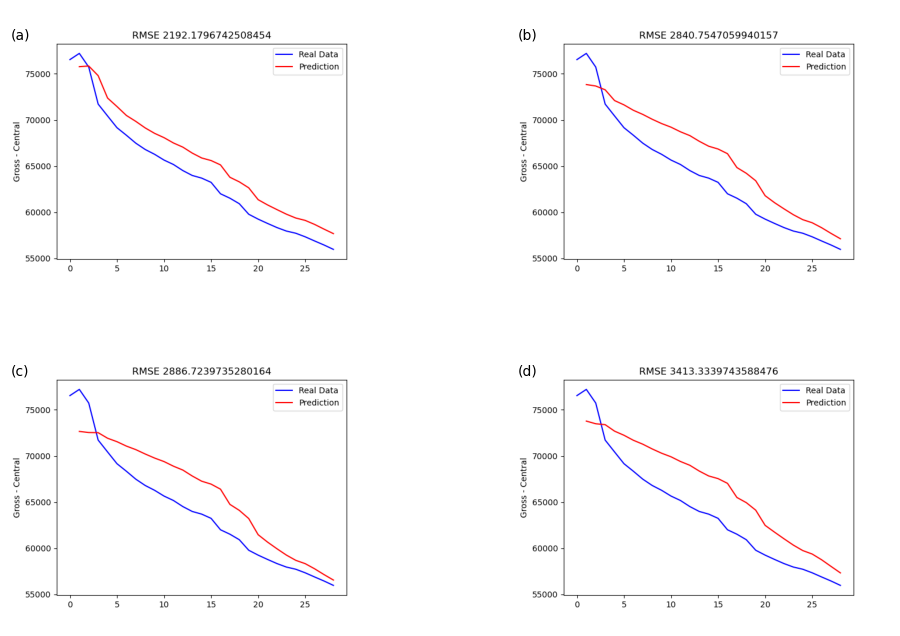

In [15]:
directory = "./result/1/"

files = os.listdir(directory)
files.pop(0)

annotations = ["(a)", "(b)", "(c)", "(d)"]
_, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()
for file, ax, an in zip(files, axs, annotations):
    img = plt.imread(directory+file)
    ax.annotate(an, xy=(0,50))
    ax.set_axis_off()
    ax.imshow(img)

# plt.savefig("./result/compiled_1.png", bbox_inches="tight")
plt.show()

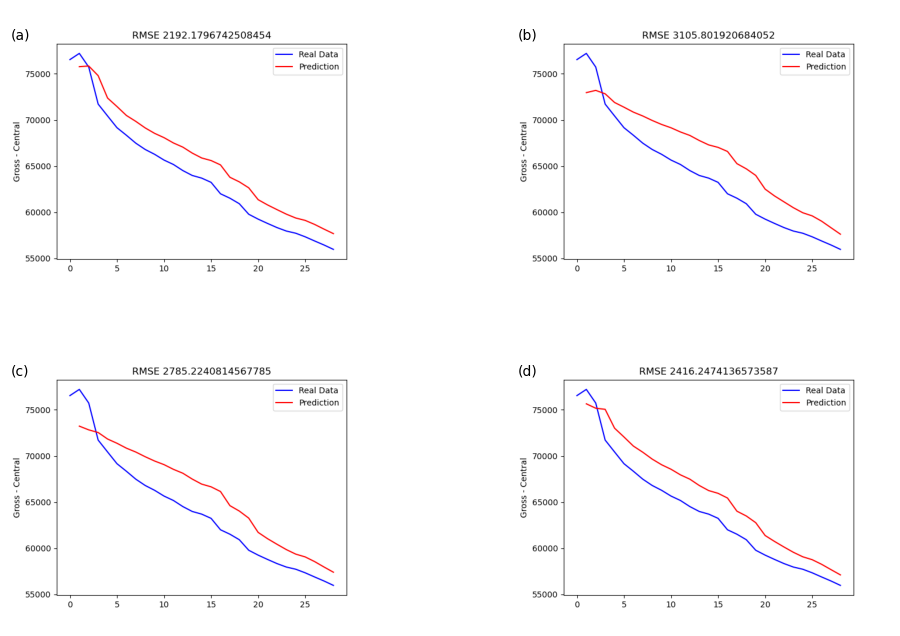

In [17]:
directory = "./result/2/"

files = os.listdir(directory)
files.pop(0)

annotations = ["(a)", "(b)", "(c)", "(d)"]
_, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axs = axs.flatten()
for file, ax, an in zip(files, axs, annotations):
    img = plt.imread(directory+file)
    ax.annotate(an, xy=(0,50))
    ax.set_axis_off()
    ax.imshow(img)

plt.savefig("./result/compiled_2.png", bbox_inches="tight")
plt.show()

In [4]:
DIR = "./dataset/synth/synth_data.csv"

df_synth = pd.read_csv(DIR)

In [5]:
DIR_ORI = "./dataset/ghg/2050-historical-and-projected-sectoral-emissions-data-November_2023-for-publishing-v01.xlsx"

df_ori = transform_ghg_dataset(DIR_ORI)
df_ori = df_ori[["Gross - Central"]]
df_ori = df_ori.iloc[:32]

df_ori.head()

,Gross - Central
0,67903.078125
1,68890.218750
2,70027.718750
3,69923.015625
4,71165.445312


In [6]:
scaler = MinMaxScaler()
df_ori_scaled = scaler.fit_transform(df_ori)

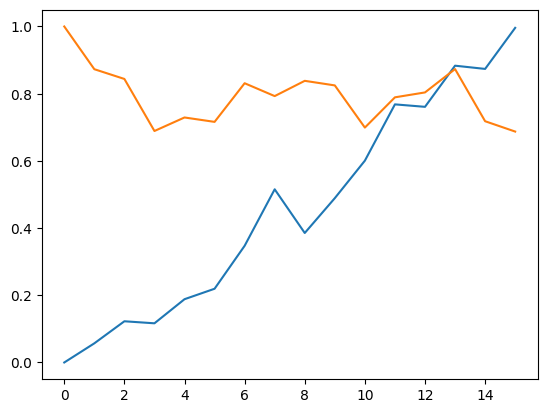

In [7]:
plt.plot(df_ori_scaled[0:16])
plt.plot(df_ori_scaled[16:32])
plt.show()

In [8]:
df_ori = np.array(real_data_loading(df_ori, 16))
df_synth = np.array(df_synth)

(16, 16) (16, 16, 1)


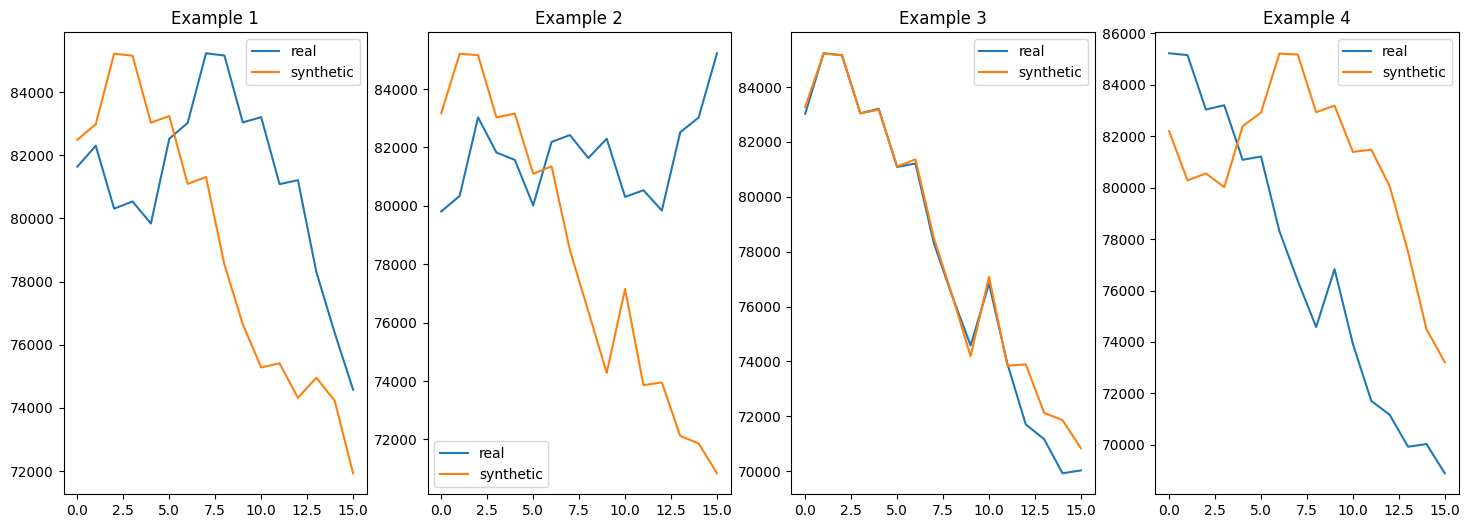

In [9]:
print(np.array(df_synth).shape, np.array(df_ori).shape)

itf_df = scaler.inverse_transform(df_ori.flatten().reshape(16, 16))
itf_synth = df_synth.flatten().reshape(16, 16)

a_list = [1,15,7,14]

fig = plt.figure(1, figsize=(18,6))

for i, obs in enumerate(a_list, 1):
    ax = plt.subplot(1, len(a_list), i)
    ax.set_title(f"Example {i}")
    ax.plot(itf_df[obs][:16], label="real")
    ax.plot(itf_synth[obs][:16], label="synthetic")
    ax.legend()

plt.show()

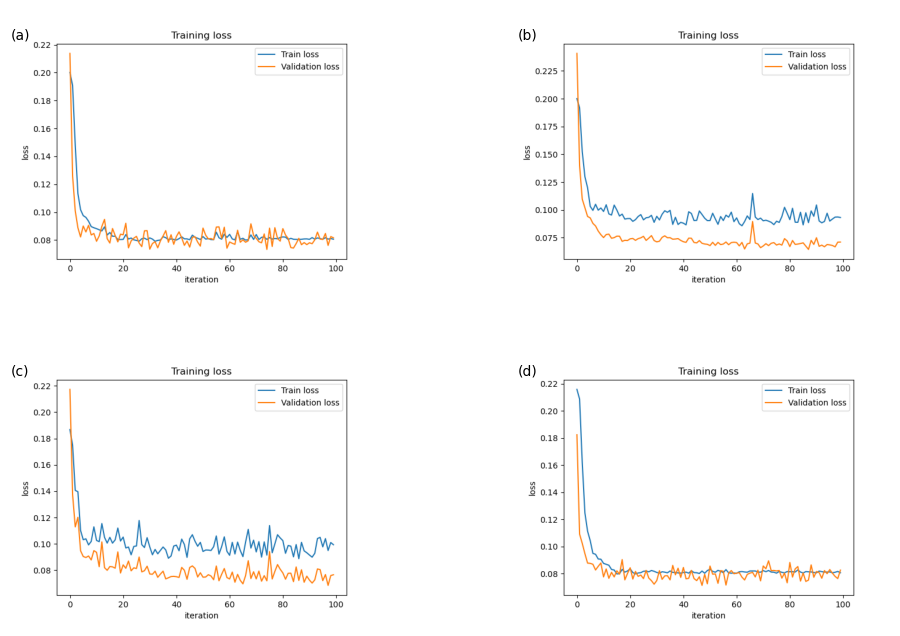

In [20]:
directory = "./result/loss/2/"

files = os.listdir(directory)
files.pop(0)

annotations = ["(a)", "(b)", "(c)", "(d)"]
_, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()
for file, ax, an in zip(files, axs, annotations):
    img = plt.imread(directory+file)
    ax.annotate(an, xy=(0,50))
    ax.set_axis_off()
    ax.imshow(img)

plt.savefig("./result/loss/compiled_2.png", bbox_inches="tight")
plt.show()